C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.855
Gradient Boosting Accuracy: 0.905


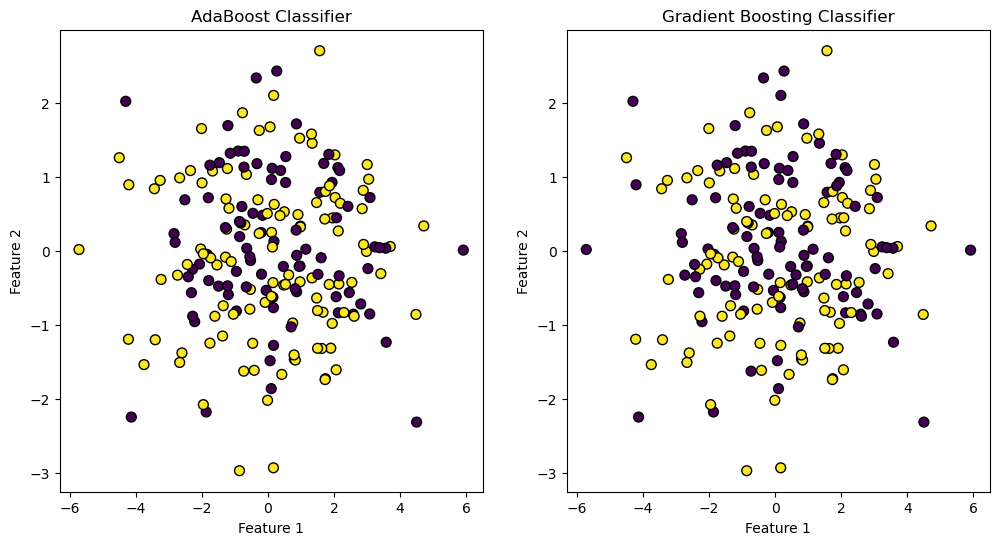

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

# Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_classifier.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

# Plot the decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("AdaBoost Classifier")
plt.scatter(X_test[:, 0], X_test[:, 1], c=adaboost_predictions, cmap='viridis', marker='o', s=50, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.title("Gradient Boosting Classifier")
plt.scatter(X_test[:, 0], X_test[:, 1], c=gradient_boosting_predictions, cmap='viridis', marker='o', s=50, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


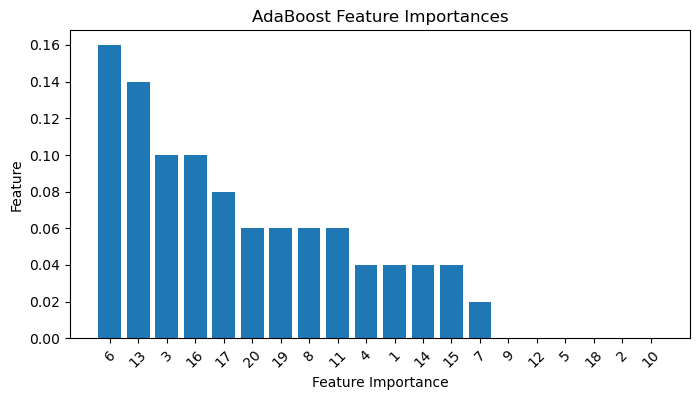

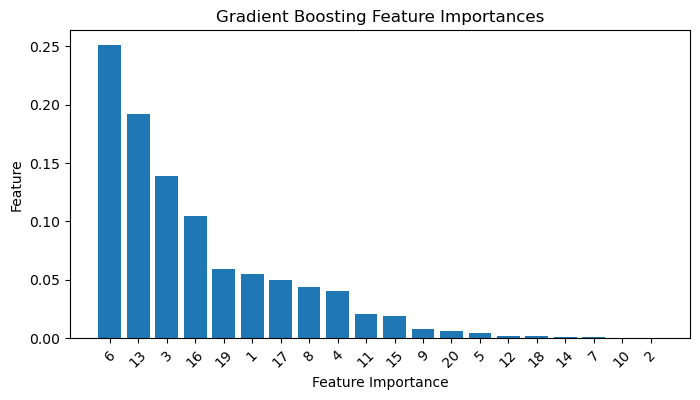

In [15]:
# Feature Importances Visualization
def plot_feature_importances(classifier, feature_names, title):
    feature_importances = classifier.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(8, 4))
    plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
    plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=45)
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

# Visualize Feature Importances
adaboost_classifier.fit(X_train, y_train)
gradient_boosting_classifier.fit(X_train, y_train)

plot_feature_importances(adaboost_classifier, np.arange(1, 21), "AdaBoost Feature Importances")
plot_feature_importances(gradient_boosting_classifier, np.arange(1, 21), "Gradient Boosting Feature Importances")


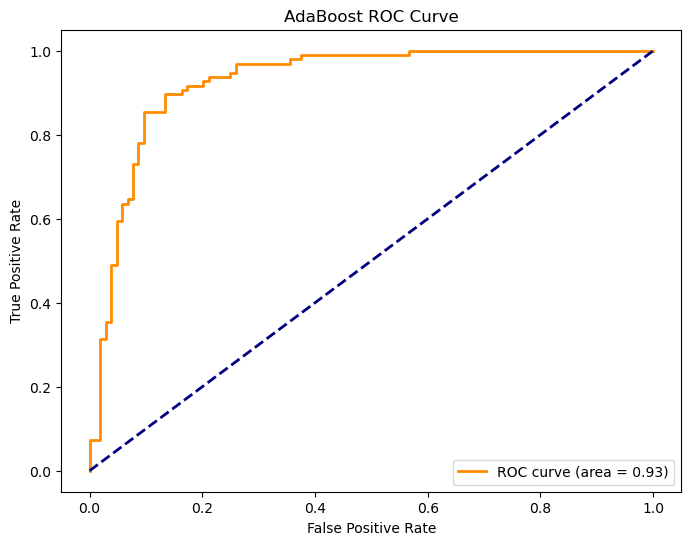

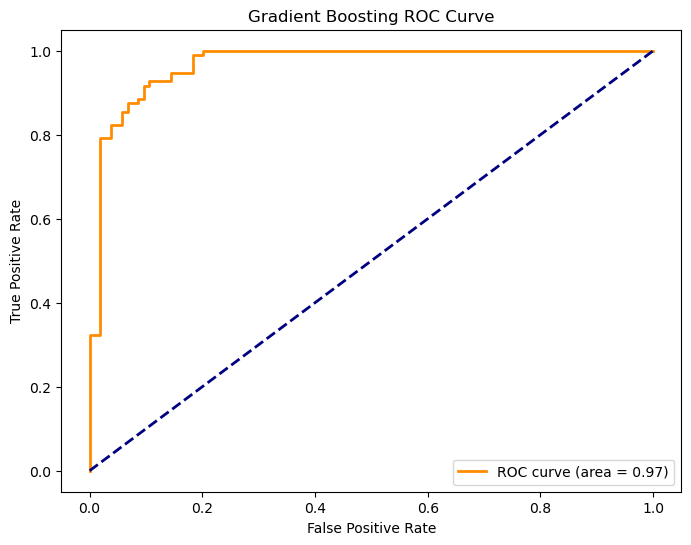

In [16]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(classifier, X_test, y_test, title):
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for both classifiers
plot_roc_curve(adaboost_classifier, X_test, y_test, "AdaBoost ROC Curve")
plot_roc_curve(gradient_boosting_classifier, X_test, y_test, "Gradient Boosting ROC Curve")


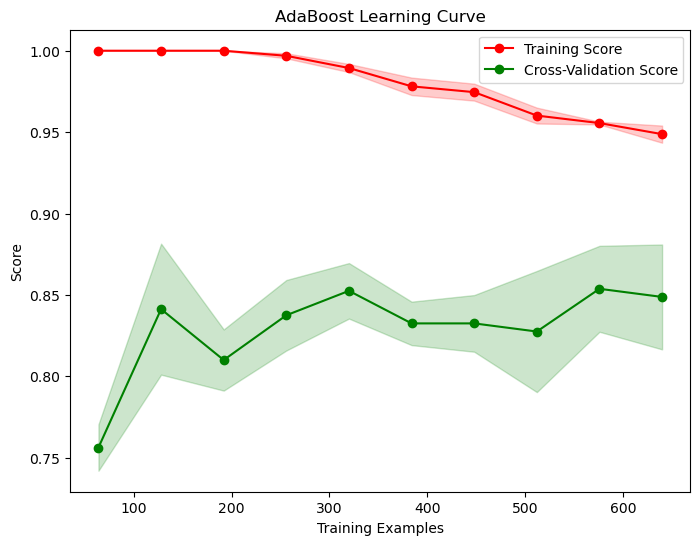

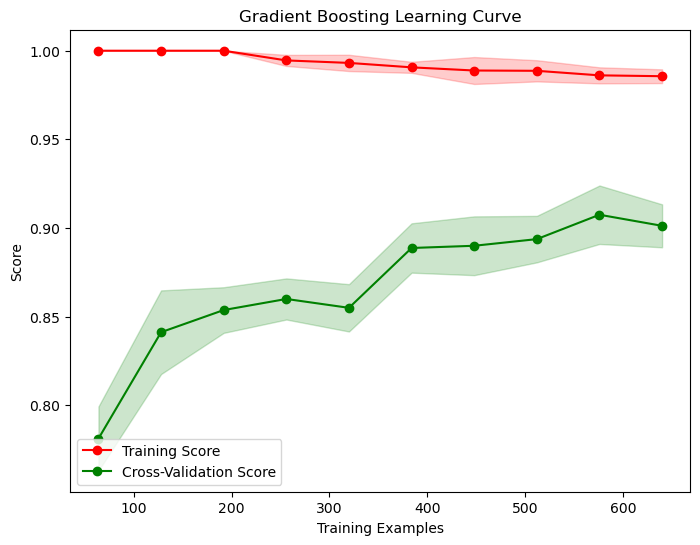

In [17]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(classifier, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')

    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for both classifiers
plot_learning_curve(adaboost_classifier, X_train, y_train, "AdaBoost Learning Curve")
plot_learning_curve(gradient_boosting_classifier, X_train, y_train, "Gradient Boosting Learning Curve")


C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\avisa\anaconda3\Lib\site-p

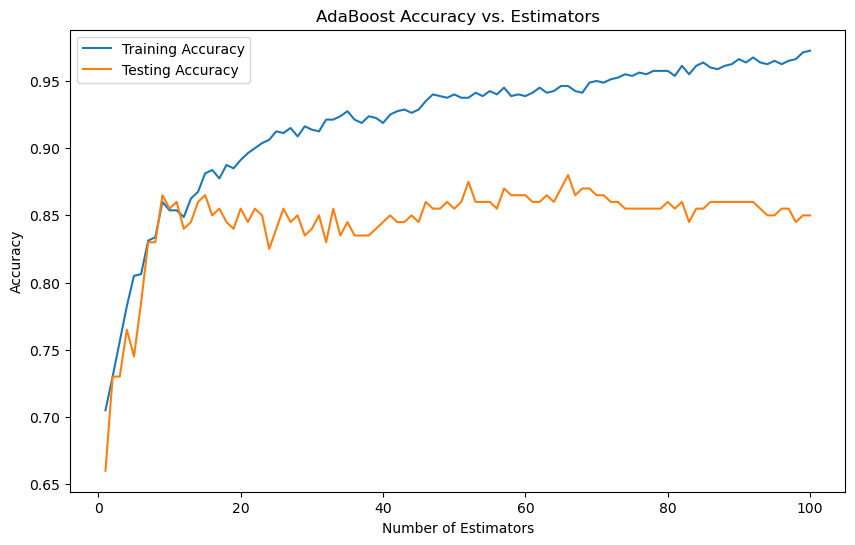

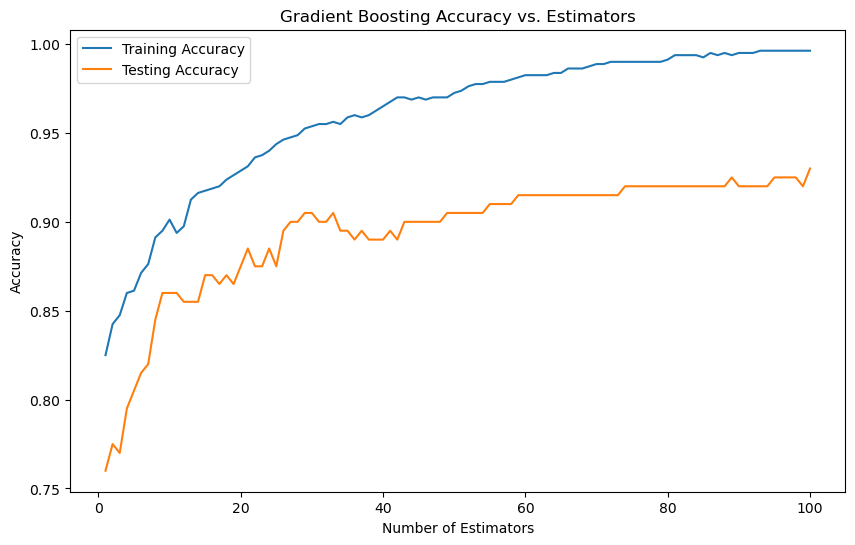

In [20]:
# Function to plot training and testing accuracies vs. number of estimators
def plot_accuracy_vs_estimators(classifier, X_train, y_train, X_test, y_test, title):
    train_accuracies = []
    test_accuracies = []

    # Vary the number of estimators from 1 to 100
    for n_estimators in range(1, 101):
        classifier.n_estimators = n_estimators
        classifier.fit(X_train, y_train)

        train_predictions = classifier.predict(X_train)
        test_predictions = classifier.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, train_predictions))
        test_accuracies.append(accuracy_score(y_test, test_predictions))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, 101), test_accuracies, label='Testing Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot accuracy vs. number of estimators for both classifiers
plot_accuracy_vs_estimators(adaboost_classifier, X_train, y_train, X_test, y_test, "AdaBoost Accuracy vs. Estimators")
plot_accuracy_vs_estimators(gradient_boosting_classifier, X_train, y_train, X_test, y_test, "Gradient Boosting Accuracy vs. Estimators")


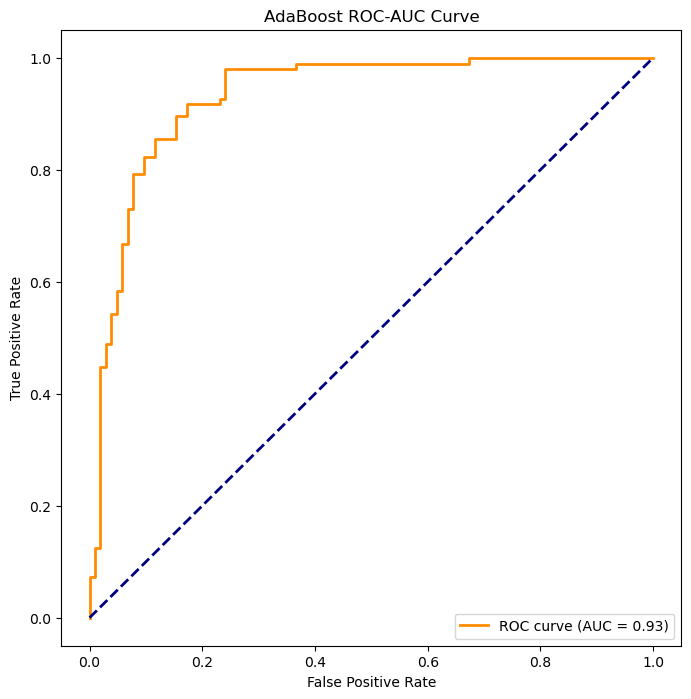

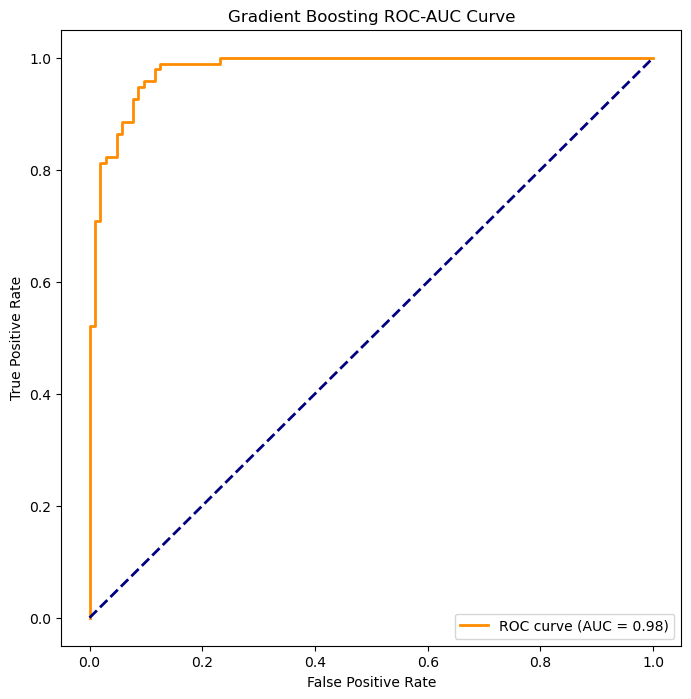

In [21]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC-AUC curve
def plot_roc_curve(classifier, X_test, y_test, title):
    # Get predicted probabilities for the positive class
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC-AUC curve for both classifiers
plot_roc_curve(adaboost_classifier, X_test, y_test, "AdaBoost ROC-AUC Curve")
plot_roc_curve(gradient_boosting_classifier, X_test, y_test, "Gradient Boosting ROC-AUC Curve")
